# Assignment 3: Predict Default of Credit Card Clients


**Submitted by: Indronil Bhattacharjee**

**Task 1.** (Holdout) Split dataset into 80%-20% for Training and Test set respectively

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)

# Split the data into training (80%) and testing (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing data to CSV files
train_data.to_csv('training.csv', index=False)
test_data.to_csv('testing.csv', index=False)


**Task 2.** (Decision Tree Classifier) Using Decision Tree with entropy as the impurity measure for splitting criterion

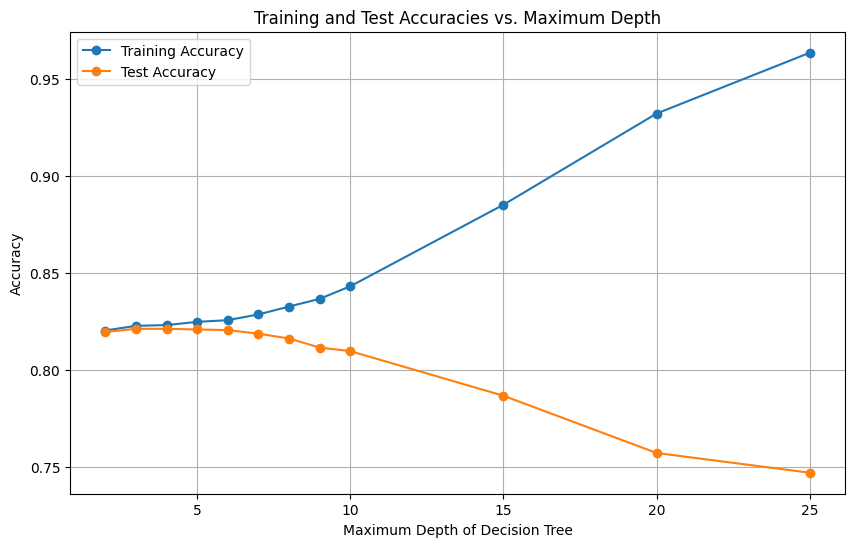

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and test sets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

# Separate features and labels
x_train = train_data.iloc[:, 1:24]
y_train = train_data['default payment next month']
X_test = test_data.iloc[:, 1:24] 
y_test = test_data['default payment next month']

# Define a list of different maximum depths for decision trees
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Fit decision trees with different maximum depths and calculate accuracies
for depth in max_depths:
    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf.fit(x_train, y_train)
    
    # Make predictions on the training and test sets
    train_preds = clf.predict(x_train)
    test_preds = clf.predict(X_test)
    
    # Calculate and store training and test accuracies
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the training and test accuracies vs. maximum depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Maximum Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. Maximum Depth')
plt.legend()
plt.grid()
plt.show()

**Findings**

1. As the maximum depth of the decision tree increases, the training accuracy steadily improves, which is expected. However, the test accuracy follows a different pattern. It initially improves as the tree becomes more complex, but then it starts to plateau and eventually decreases. This phenomenon indicates overfitting.

2. The optimal maximum depth appears to be around 5 or 6. At this point, the test accuracy is the highest, indicating the best trade-off between model complexity and generalization performance. This depth provides a balance between capturing patterns in the data and avoiding overfitting.

3. Beyond a maximum depth of around 6, the test accuracy starts to decline. This decline suggests that the model is becoming too complex and is fitting noise in the data, which hurts its ability to generalize to unseen data.

4. It is important to note that the training accuracy continues to increase with higher maximum depths, but the test accuracy does not follow the same trend. This divergence between training and test accuracy is a clear sign of overfitting.

**Task 3.** (k-Nearest Neighbor Classifier) Train a KNN classifier and measure performance on both the training set and the test set

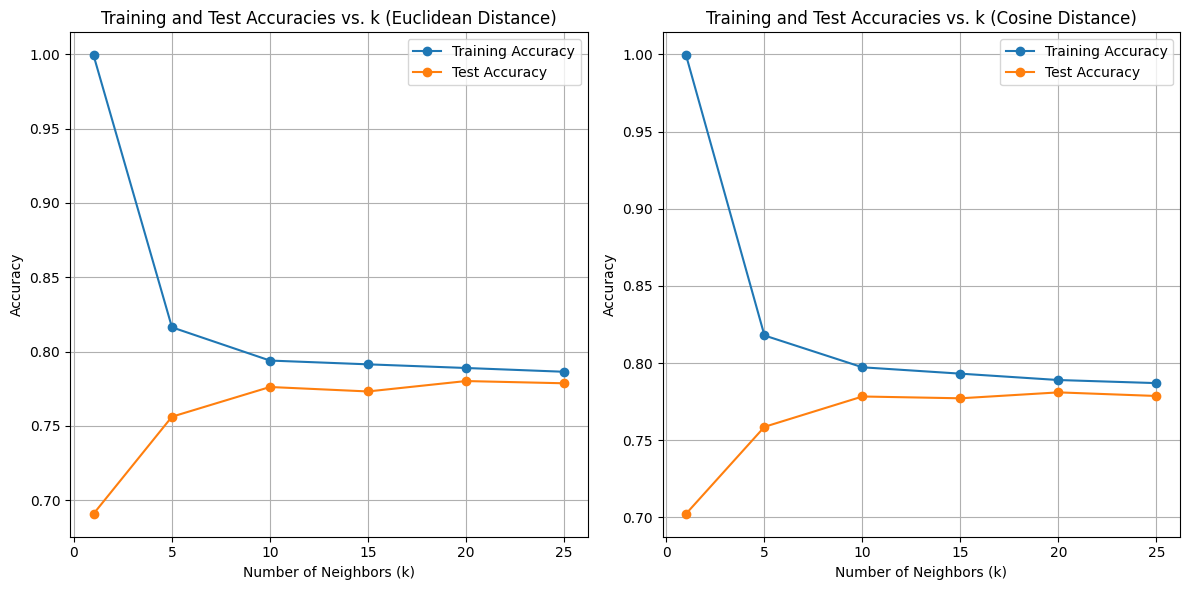

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and test sets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

# Separate features and labels
x_train = train_data.iloc[:, 1:24]  # Features
y_train = train_data['default payment next month']  # Labels
X_test = test_data.iloc[:, 1:24]    # Features
y_test = test_data['default payment next month']  # Labels

# Define a list of different values for k
k_values = [1, 5, 10, 15, 20, 25]

# Initialize lists to store training and test accuracies for Euclidean and Cosine distances
train_accuracies_euclidean = []
test_accuracies_euclidean = []
train_accuracies_cosine = []
test_accuracies_cosine = []

# Fit k-nearest neighbor classifiers for different values of k and distances
for k in k_values:
    # Create and train the k-nearest neighbor classifier with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(x_train, y_train)
    
    # Make predictions on the training and test sets with Euclidean distance
    train_preds_euclidean = knn_euclidean.predict(x_train)
    test_preds_euclidean = knn_euclidean.predict(X_test)
    
    # Calculate and store training and test accuracies with Euclidean distance
    train_accuracy_euclidean = accuracy_score(y_train, train_preds_euclidean)
    test_accuracy_euclidean = accuracy_score(y_test, test_preds_euclidean)
    
    train_accuracies_euclidean.append(train_accuracy_euclidean)
    test_accuracies_euclidean.append(test_accuracy_euclidean)
    
    # Create and train the k-nearest neighbor classifier with Cosine distance
    knn_cosine = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_cosine.fit(x_train, y_train)
    
    # Make predictions on the training and test sets with Cosine distance
    train_preds_cosine = knn_cosine.predict(x_train)
    test_preds_cosine = knn_cosine.predict(X_test)
    
    # Calculate and store training and test accuracies with Cosine distance
    train_accuracy_cosine = accuracy_score(y_train, train_preds_cosine)
    test_accuracy_cosine = accuracy_score(y_test, test_preds_cosine)
    
    train_accuracies_cosine.append(train_accuracy_cosine)
    test_accuracies_cosine.append(test_accuracy_cosine)

# Plot the training and test accuracies for Euclidean distance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracies_euclidean, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies_euclidean, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. k (Euclidean Distance)')
plt.legend()
plt.grid()

# Plot the training and test accuracies for Cosine distance
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies_cosine, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies_cosine, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. k (Cosine Distance)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Findings**

1. The best value of k among the given values of k for achieving the highest test accuracy appears to be 20. This suggests that considering 20 nearest neighbors when making predictions provides the best balance between model complexity and generalization performance.

2. It is interesting to note that this optimal k value (k=20) is consistent for both Euclidean and Cosine distance metrics. This implies that the choice of distance metric (whether Euclidean or Cosine) does not significantly impact the choice of the optimal k value in this context.

3. The choice of k is associated with the bias-variance trade-off in kNN. Smaller values of k tend to overfit the training data (high training accuracy, lower test accuracy), while larger values of k tend to underfit (lower training accuracy, moderate test accuracy). The optimal k value, in this case, helps strike the right balance between underfitting and overfitting.

**Task 4.** Finding highest test accuracy and improving testing accuracy

1. Highest test accuracy for Euclidean distance metric-

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the training and test sets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

# Separate features and labels
x_train = train_data.iloc[:, 1:24]
y_train = train_data['default payment next month']
X_test = test_data.iloc[:, 1:24]
y_test = test_data['default payment next month']

# Find the optimal k value with the highest test accuracy for Euclidean distance
best_k = None
best_accuracy = 0

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

# Train the k-NN classifier with the best k value and Euclidean distance
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(x_train, y_train)
test_pred_best_k = best_knn.predict(X_test)
test_accuracy_best_k = accuracy_score(y_test, test_pred_best_k)

print(f"Best k for euclidean metric: {best_k}")
print(f"Best testing accuracy (k={best_k}): {test_accuracy_best_k:.4f}")

Best k for euclidean metric: 22
Best testing accuracy (k=22): 0.7807


2. Highest test accuracy for Cosine distance metric-

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the training and test sets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

# Separate features and labels
x_train = train_data.iloc[:, 1:24]
y_train = train_data['default payment next month']
X_test = test_data.iloc[:, 1:24]
y_test = test_data['default payment next month']

# Find the optimal k value with the highest test accuracy for Euclidean distance
best_k = None
best_accuracy = 0

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(x_train, y_train)
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

# Train the k-NN classifier with the best k value and Euclidean distance
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
best_knn.fit(x_train, y_train)
test_pred_best_k = best_knn.predict(X_test)
test_accuracy_best_k = accuracy_score(y_test, test_pred_best_k)

print(f"Best k for cosine metric: {best_k}")
print(f"Best testing accuracy (k={best_k}): {test_accuracy_best_k:.4f}")

Best k for cosine metric: 24
Best testing accuracy (k=24): 0.7812


Improving KNN Efficiency can be done in different methods. Like-

• Multi-dimensional access methods (k-d trees)

• Feature Engineering

• Hyperparameter Tuning

• Cross-validation

• Locality Sensitive Hashing


Two of these methods, cross-validation and hyperparameter tuning has been used here to improve KNN efficiency.


1. For best k=22 for Euclidean distance metric-

In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load the training and test sets from Question 1
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:24]  # Features
y_train = train_data['default payment next month']  # Labels
X_test = test_data.iloc[:, 1:24]    # Features
y_test = test_data['default payment next month']  # Labels

# Feature scaling for better k-NN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform hyperparameter tuning using grid search
param_grid = {
    'n_neighbors': [22],  # Optimal k-value
    'metric': ['euclidean']  # Optimal distance metric
}

# Initialize k-NN classifier
knn = KNeighborsClassifier()

# Create grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit grid search to training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_knn = grid_search.best_estimator_

# Make predictions on the test set
test_preds = best_knn.predict(X_test_scaled)

# Calculate and print the improved test accuracy
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Improved Test Accuracy: {test_accuracy:.4f}")


Improved Test Accuracy: 0.8105


2. For best k=24 for Cosine distance metric-

In [20]:
param_grid = {
    'n_neighbors': [24],  # Optimal k-value for cosine distance metric
    'metric': ['cosine']  
}

# Initialize k-NN classifier
knn = KNeighborsClassifier()

# Create grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit grid search to training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_knn = grid_search.best_estimator_

# Make predictions on the test set
test_preds = best_knn.predict(X_test_scaled)

# Calculate and print the improved test accuracy
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Improved Test Accuracy: {test_accuracy:.4f}")

Improved Test Accuracy: 0.8125
